In [12]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import sys
import time
import datetime as dt
import pandas as pd
import geopandas as gpd
import pygmt

In [2]:
# gmt surface

In [78]:
new_gpr = gpd.read_file('/Volumes/arc_04/FIELD_DATA/K8621920/RES/PROCESSED_LINES/picked_bed.shp')
cross_channel_lines = ['line7p75','line7p5','line7p25','line7', 'line6','line5','lineAPREScross','line4','line3','line2','line1','line0','line8','line9']

In [79]:
new_gpr = new_gpr[new_gpr.camp=='KIS2'].copy()

In [80]:
# for line_name in new_gpr.line_name.unique():
#     if line_name not in cross_channel_lines:
#         i_names = new_gpr[new_gpr.line_name == line_name].index
#         new_gpr.drop(i_names,inplace=True)

In [81]:
new_gpr.line_name.unique()

array(['line7', 'line9', 'line0', 'line10', 'line11', 'line12', 'line13',
       'line14', 'line1', 'line2', 'line3', 'line4', 'line6', 'line7p25',
       'line7p5', 'line7p75', 'line8', 'lineAPREScross', 'lineAPRESdown',
       'lineback2camp', 'linedownchan', 'lineupchan', 'left02',
       'left1011', 'left1213', 'left1415', 'left35', 'left46', 'left79',
       'left810', 'right1112', 'right1314', 'right13', 'right24',
       'right68', 'right910', 'line5'], dtype=object)

In [82]:
gpr = new_gpr[['x', 'y','bed']].copy()

In [83]:
xmin, xmax, ymin, ymax = -382700, -374781.9, -734075.1, -721770.2

In [92]:
surf = pygmt.surface(gpr.x,gpr.y,gpr.bed,spacing="100+e",region=[xmin, xmax, ymin, ymax],T=0.9)

surface [WARNING]: Your grid dimensions are mutually prime.  Convergence is very unlikely.
surface [WARNING]: 29933 unusable points were supplied; these will be ignored.
surface [WARNING]: You should have pre-processed the data with block-mean, -median, or -mode.
surface [WARNING]: Check that previous processing steps write results with enough decimals.
surface [WARNING]: Possibly some data were half-way between nodes and subject to IEEE 754 rounding.


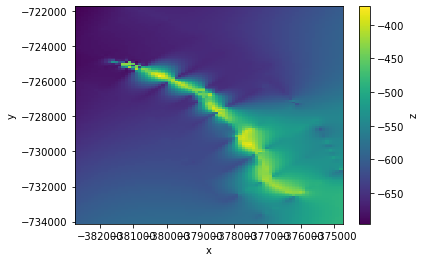

In [93]:
surf.plot()

In [94]:
bed = surf.to_masked_array().data
x = surf.coords["x"].to_masked_array().data
y = surf.coords["y"].to_masked_array().data

In [95]:
np.save('/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RADAR_MAP/gmtsurf_bed.npy',
       bed)
np.save('/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RADAR_MAP/gmtsurf_x.npy',
       x)
np.save('/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RADAR_MAP/gmtsurf_y.npy',
       y)